In [2]:
import pickle
import pandas as pd
import folium
from tqdm import tqdm
import os
import warnings
warnings.filterwarnings("ignore")
import re
import seaborn as sns
import numpy as np
pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None  # default='warn'
from IPython.display import clear_output
import geopandas as gpd
from functools import partial

import sys
sys.path.append("../")
import src.supportClean as sc

import sys
sys.path.append("../")
import src.bibliotheque as bb

In [3]:
from geopy import Nominatim
locator = Nominatim(user_agent="myGeocoder")

# data input

In [4]:
df_original = pd.read_json('../data/tripadvisor/tripadvisor_.json')
print(df_original.shape)
df_original.head()

(10587, 5)


,name_raw,price_raw,reviews,rating_raw,url
0,"<a href=""/Restaurant_Review-g187514-d2006562-R...","[Cerrado ahora, Española, Internacional, €€ - ...","<span class=""IiChw"">10.747<!-- --> opiniones</...","<span class=""GmcgY""><svg class=""UctUV d H0"" vi...",/Restaurant_Review-g187514-d2006562-Reviews-Lo...
1,"<a href=""/Restaurant_Review-g187514-d23446200-...","[Cerrado ahora, Argentina, Sudamericana]","<span class=""IiChw"">158<!-- --> opiniones</span>","<span class=""GmcgY""><svg class=""UctUV d H0"" vi...",/Restaurant_Review-g187514-d23446200-Reviews-E...
2,"<a href=""/Restaurant_Review-g187514-d23999961-...","[Cerrado ahora, Peruana, Street food / Comida ...","<span class=""IiChw"">305<!-- --> opiniones</span>","<span class=""GmcgY""><svg class=""UctUV d H0"" vi...",/Restaurant_Review-g187514-d23999961-Reviews-L...
3,"<a href=""/Restaurant_Review-g187514-d18480953-...","[Cerrado ahora, Italiana, Pizza, €€ - €€€]","<span class=""IiChw"">720<!-- --> opiniones</span>","<span class=""GmcgY""><svg class=""UctUV d H0"" vi...",/Restaurant_Review-g187514-d18480953-Reviews-P...
4,"<a href=""/Restaurant_Review-g187514-d12216862-...","[Cierra en 10 minutos, Latina, Bar, €€ - €€€]","<span class=""IiChw"">3806<!-- --> opiniones</span>","<span class=""GmcgY""><svg class=""UctUV d H0"" vi...",/Restaurant_Review-g187514-d12216862-Reviews-G...


In [5]:
df_enriched = pd.read_json('../data/tripadvisor/restaurants.json')
print(df_enriched.shape)
df_enriched.head()

(9600, 17)


,name,url,province,city,price_all,price,direction,latitude,longitude,cuisines,meals,specialDiets,priceRangeNum,locationAll,coordinates,rating,positionlink
0,Los Montes de Galicia,/Restaurant_Review-g187514-d2006562-Reviews-Lo...,Comunidad de Madrid,Madrid,"[<span class=""DsyBj DxyfE""><a class=""dlMOJ"" hr...",€€ - €€€,"Calle Azcona 46 PISO 8, 28028 Madrid España",NaN,NaN,"Española, Internacional, Mediterránea, Saludable",None,None,50 € - 80 €,NaN,NaN,"[5,0 de 5 burbujas]",NaN
1,Empanadas Malvón,/Restaurant_Review-g187514-d23446200-Reviews-E...,Comunidad de Madrid,Madrid,"[<span class=""DsyBj DxyfE""><a class=""dlMOJ"" hr...",Argentina,"Calle de Luchana 3, 28010 Madrid España",NaN,NaN,"Argentina, Sudamericana","Comidas, Cenas",None,None,NaN,NaN,"[5,0 de 5 burbujas]",NaN
2,La Bajada Street Food,/Restaurant_Review-g187514-d23999961-Reviews-L...,Comunidad de Madrid,Madrid,"[<span class=""DsyBj DxyfE""><a class=""dlMOJ"" hr...",Peruana,Calla Alcalá 414. Ciudad lineal dentro del cen...,NaN,NaN,"Peruana, Street food / Comida en la calle, Sud...","Comidas, Cenas",None,None,NaN,NaN,"[5,0 de 5 burbujas]",NaN
3,Pastamore,/Restaurant_Review-g187514-d18480953-Reviews-P...,Comunidad de Madrid,Madrid,"[<span class=""DsyBj DxyfE""><a class=""dlMOJ"" hr...",€€ - €€€,"Calle Alcalá, 191, 28009 Madrid España",NaN,NaN,"Italiana, Pizza, Mediterránea, Saludable, Tosc...",None,"Opciones vegetarianas, Opciones veganas, Opcio...",15 € - 23 €,NaN,NaN,"[5,0 de 5 burbujas]",NaN
4,Grama Lounge,/Restaurant_Review-g187514-d12216862-Reviews-G...,Comunidad de Madrid,Madrid,"[<span class=""DsyBj DxyfE""><a class=""dlMOJ"" hr...",€€ - €€€,"Calle de la Cruz 19, 28012 Madrid España",NaN,NaN,"Latina, Bar, Venezolana",None,None,5 € - 18 €,NaN,NaN,"[5,0 de 5 burbujas]",NaN


In [6]:
df = df_original.merge(df_enriched, left_on='url', right_on='url', how = 'right', indicator = True)
df['_merge'].value_counts()

both          9601
left_only        0
right_only       0
Name: _merge, dtype: int64

In [7]:
print(df.shape)
df.head(1)

(9601, 22)


,name_raw,price_raw,reviews,rating_raw,url,name,province,city,price_all,price,direction,latitude,longitude,cuisines,meals,specialDiets,priceRangeNum,locationAll,coordinates,rating,positionlink,_merge
0,"<a href=""/Restaurant_Review-g187514-d2006562-R...","[Cerrado ahora, Española, Internacional, €€ - ...","<span class=""IiChw"">10.747<!-- --> opiniones</...","<span class=""GmcgY""><svg class=""UctUV d H0"" vi...",/Restaurant_Review-g187514-d2006562-Reviews-Lo...,Los Montes de Galicia,Comunidad de Madrid,Madrid,"[<span class=""DsyBj DxyfE""><a class=""dlMOJ"" hr...",€€ - €€€,"Calle Azcona 46 PISO 8, 28028 Madrid España",NaN,NaN,"Española, Internacional, Mediterránea, Saludable",None,None,50 € - 80 €,NaN,NaN,"[5,0 de 5 burbujas]",NaN,both


# cleaning

## price categories
checking the price categories, there are less categories than on the original file. We will need to evaluate if it's possible to split the data to get another category in the `€€` cone more equivalent to a medium-high price range.

In [8]:
df['priceRange_clean'] = df['price'].str.extract(r'(€{1,})')
df['priceRange_clean'].value_counts()

€€      4995
€       1785
€€€€     332
Name: priceRange_clean, dtype: int64

In [9]:
df['min_PriceRangeNum'] = df['priceRangeNum'].str.extract(r'(.*)€ - .*€').astype(float)
df['max_PriceRangeNum'] = df['priceRangeNum'].str.extract(r'.*€ - (.*)€').astype(float)
df['avg_PriceRangeNum'] = df[["min_PriceRangeNum","max_PriceRangeNum"]].mean(axis = 1)
df[['avg_PriceRangeNum', 'priceRange_clean']].value_counts()

avg_PriceRangeNum  priceRange_clean
20.0               €€                  177
15.0               €€                  144
17.5               €€                  139
25.0               €€                  117
12.5               €€                  113
                                      ... 
51.0               €€€€                  1
50.5               €€                    1
49.5               €€€€                  1
49.0               €€€€                  1
301.0              €€€€                  1
Length: 258, dtype: int64

In [10]:
df[df['priceRange_clean']=='€€']['avg_PriceRangeNum'].value_counts()

20.0     177
15.0     144
17.5     139
25.0     117
12.5     113
        ... 
118.0      1
92.5       1
72.0       1
74.0       1
44.0       1
Name: avg_PriceRangeNum, Length: 119, dtype: int64

In [11]:
df_modified = df[df['priceRange_clean'] == '€€']
df_notmodified = df[df['priceRange_clean'] != '€€']

In [12]:
df_modified['avg_PriceRangeNum'].mean()

21.101611635220127

In [13]:
df_modified['priceRange_clean'] = np.where((df_modified['avg_PriceRangeNum'] > df_modified['avg_PriceRangeNum'].mean()), '€€€', '€€')

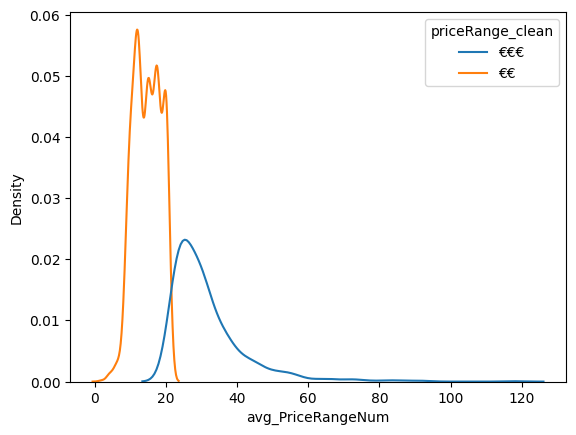

In [14]:
sns.kdeplot(data=df_modified, hue='priceRange_clean', x='avg_PriceRangeNum');

In [15]:
df = pd.concat([df_modified, df_notmodified], axis = 0)
df.shape

(9601, 26)

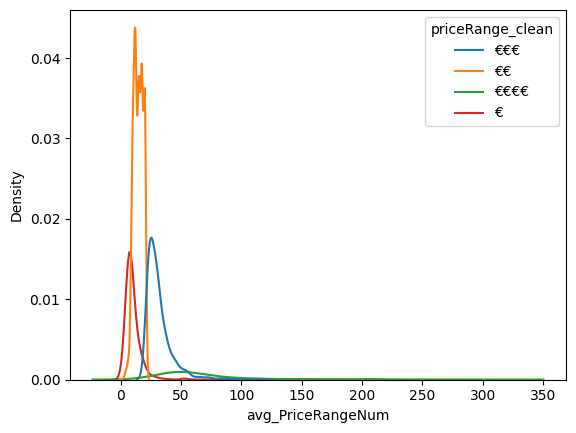

In [16]:
sns.kdeplot(data=df, hue='priceRange_clean', x='avg_PriceRangeNum');

In [17]:
df['priceRange_clean'].value_counts()

€€      4033
€       1785
€€€      962
€€€€     332
Name: priceRange_clean, dtype: int64

## reviews

In [18]:
df.head(1)

,name_raw,price_raw,reviews,rating_raw,url,name,province,city,price_all,price,direction,latitude,longitude,cuisines,meals,specialDiets,priceRangeNum,locationAll,coordinates,rating,positionlink,_merge,priceRange_clean,min_PriceRangeNum,max_PriceRangeNum,avg_PriceRangeNum
0,"<a href=""/Restaurant_Review-g187514-d2006562-R...","[Cerrado ahora, Española, Internacional, €€ - ...","<span class=""IiChw"">10.747<!-- --> opiniones</...","<span class=""GmcgY""><svg class=""UctUV d H0"" vi...",/Restaurant_Review-g187514-d2006562-Reviews-Lo...,Los Montes de Galicia,Comunidad de Madrid,Madrid,"[<span class=""DsyBj DxyfE""><a class=""dlMOJ"" hr...",€€ - €€€,"Calle Azcona 46 PISO 8, 28028 Madrid España",NaN,NaN,"Española, Internacional, Mediterránea, Saludable",None,None,50 € - 80 €,NaN,NaN,"[5,0 de 5 burbujas]",NaN,both,€€€,50.0,80.0,65.0


In [19]:
df['reviews_clean'] = df['reviews'].str.extract(r'">(.*)<!-- -->.*</')[0].str.replace('.','')

## rating

In [20]:
df.head(1)

,name_raw,price_raw,reviews,rating_raw,url,name,province,city,price_all,price,direction,latitude,longitude,cuisines,meals,specialDiets,priceRangeNum,locationAll,coordinates,rating,positionlink,_merge,priceRange_clean,min_PriceRangeNum,max_PriceRangeNum,avg_PriceRangeNum,reviews_clean
0,"<a href=""/Restaurant_Review-g187514-d2006562-R...","[Cerrado ahora, Española, Internacional, €€ - ...","<span class=""IiChw"">10.747<!-- --> opiniones</...","<span class=""GmcgY""><svg class=""UctUV d H0"" vi...",/Restaurant_Review-g187514-d2006562-Reviews-Lo...,Los Montes de Galicia,Comunidad de Madrid,Madrid,"[<span class=""DsyBj DxyfE""><a class=""dlMOJ"" hr...",€€ - €€€,"Calle Azcona 46 PISO 8, 28028 Madrid España",NaN,NaN,"Española, Internacional, Mediterránea, Saludable",None,None,50 € - 80 €,NaN,NaN,"[5,0 de 5 burbujas]",NaN,both,€€€,50.0,80.0,65.0,10747


In [21]:
type(df['rating'][0][0])

str

In [22]:
df['rating'].value_counts()

[4,0 de 5 burbujas]     2607
[4,5 de 5 burbujas]     1952
[3,5 de 5 burbujas]     1796
[5,0 de 5 burbujas]     1103
[3,0 de 5 burbujas]     1014
[2,5 de 5 burbujas]      448
[-1,0 de 5 burbujas]     255
[2,0 de 5 burbujas]      230
[1,0 de 5 burbujas]      113
[1,5 de 5 burbujas]       66
[]                        16
[0 opiniones]              1
Name: rating, dtype: int64

In [37]:
df['rating_clean'] = df['rating'].explode().replace(bb.ratings)

In [38]:
df.head(1)

,name_raw,price_raw,reviews,rating_raw,url,name,province,city,price_all,price,direction,latitude,longitude,cuisines,meals,specialDiets,priceRangeNum,locationAll,coordinates,rating,positionlink,_merge,priceRange_clean,min_PriceRangeNum,max_PriceRangeNum,avg_PriceRangeNum,reviews_clean,rating_clean
0,"<a href=""/Restaurant_Review-g187514-d2006562-R...","[Cerrado ahora, Española, Internacional, €€ - ...","<span class=""IiChw"">10.747<!-- --> opiniones</...","<span class=""GmcgY""><svg class=""UctUV d H0"" vi...",/Restaurant_Review-g187514-d2006562-Reviews-Lo...,Los Montes de Galicia,Comunidad de Madrid,Madrid,"[<span class=""DsyBj DxyfE""><a class=""dlMOJ"" hr...",€€ - €€€,"Calle Azcona 46 PISO 8, 28028 Madrid España",NaN,NaN,"Española, Internacional, Mediterránea, Saludable",None,None,50 € - 80 €,NaN,NaN,"[5,0 de 5 burbujas]",NaN,both,€€€,50.0,80.0,65.0,10747,5.0


# geolocation

In [ ]:
df['direction_clean'] = df['direction'].str.lower().str.findall(r'(.*\d{1,3})\W?.*(\d{5} madrid españa)').explode().str.join(', ')
df['direction_clean'].value_counts()

In [ ]:
df_geolocated = sc.geolocation(df, 'direction_clean')

In [ ]:
print('location null:', df[df['location'].isnull() == True].shape, 'coordinates null:', df[df['point'].isnull() == True].shape)

In [ ]:
map1 = folium.Map(
    location=[40.41694, -3.70361],
    tiles='cartodbpositron',
    zoom_start=12,
)
df_geolocated[df_geolocated['latitude'].isnull() == False].apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(map1), axis=1)
map1

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.latitude, df.longitude)).set_crs('epsg:25830')
ax = gdf.to_crs(epsg=3857).plot(column='price', cmap=None)
cx.add_basemap(ax)

In [ ]:
# ouput of the geolocation in case the process breaks
df_geolocated.to_csv('../data/tripadvisor/tripadvisor_geolocated.csv')